# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


The **learning rate** in Stochastic Gradient Descent (SGD) controls the size of parameter updates during training and strongly influences convergence.
If the learning rate is **too high**, the algorithm may overshoot the minimum, causing oscillations or divergence.
If it is **too low**, convergence becomes very slow and training may stall before reaching a good solution.
An **appropriately chosen learning rate** enables fast, stable convergence toward a minimum of the loss function.
Common strategies include using a **fixed learning rate**, **learning rate decay schedules** (step or exponential), **adaptive optimizers** like Adam or RMSProp, **learning rate warm-up**, and **learning rate finders** to select an effective value.



#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [4]:
import pandas as pd
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Real estate.csv")

# Features and target
X = df.iloc[:, 1:-1].values   # all X columns
y = df.iloc[:, -1].values    # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(epochs):
        gradients = (1/m) * X.T @ (X @ theta - y)
        theta -= lr * gradients

    return theta


In [8]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=50):
    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(epochs):
        for i in range(m):
            xi = X[i].reshape(1, -1)
            yi = y[i]
            gradient = xi.T @ (xi @ theta - yi)
            theta -= lr * gradient.flatten()

    return theta
theta_gd = batch_gradient_descent(X_train, y_train, lr=0.01, epochs=1000)
theta_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=50)
y_pred_gd = X_test @ theta_gd
y_pred_sgd = X_test @ theta_sgd
results = pd.DataFrame({
    "Model": ["Batch GD", "SGD"],
    "MSE": [
        mean_squared_error(y_test, y_pred_gd),
        mean_squared_error(y_test, y_pred_sgd)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_gd),
        r2_score(y_test, y_pred_sgd)
    ]
})

results
theta_sgd_new = stochastic_gradient_descent(
    X_train, y_train, lr=0.001, epochs=200
)

y_pred_sgd_new = X_test @ theta_sgd_new

mean_squared_error(y_test, y_pred_sgd_new), r2_score(y_test, y_pred_sgd_new)


(53.64246875823707, 0.6802423077619668)

The path of Stochastic Gradient Descent (SGD) appears erratic compared to Batch Gradient Descent (GD) because SGD updates the model parameters using only one training example at a time. Each individual data point provides a noisy and imperfect estimate of the true gradient, which causes the optimization path to fluctuate rather than move smoothly toward the minimum as in GD, which uses the full dataset to compute an exact gradient. Despite this noise, SGD is often preferred for very large datasets because it is computationally much faster per update, requires less memory, and can start improving the model before seeing the entire dataset. Additionally, the inherent noise in SGD can help the algorithm escape shallow local minima and saddle points, leading to good generalization in practice.


# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



### **a)**

A **Decision Tree** is a **supervised learning algorithm** because it is trained on labeled data and learns rules to predict class labels or target values.

---

### **b)**

**Entropy** measures the level of impurity or randomness in a dataset at a node. It quantifies how mixed the class labels are, with lower entropy indicating a purer node.

---

### **c)**

A **reduction in entropy** indicates that a split has made the data more homogeneous in the child nodes. Greater reduction means a better split, as it improves class separation.

---

### **d) Numerical Solution**

**Entropy of root node:**
[
H_{root} = 1.00
]

---

**Split (x \le -2):**

* Weighted entropy = 0.89
* Entropy reduction = 0.11

---

**Split (x \le 2):**

* Weighted entropy = 0.89
* Entropy reduction = 0.11

---

**Split (y \le 2):**

* Weighted entropy = 0.72
* Entropy reduction = **0.28**

---

### **Final Decision**

The split **(y \le 2)** is chosen because it gives the **maximum entropy reduction (0.28)**.


### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


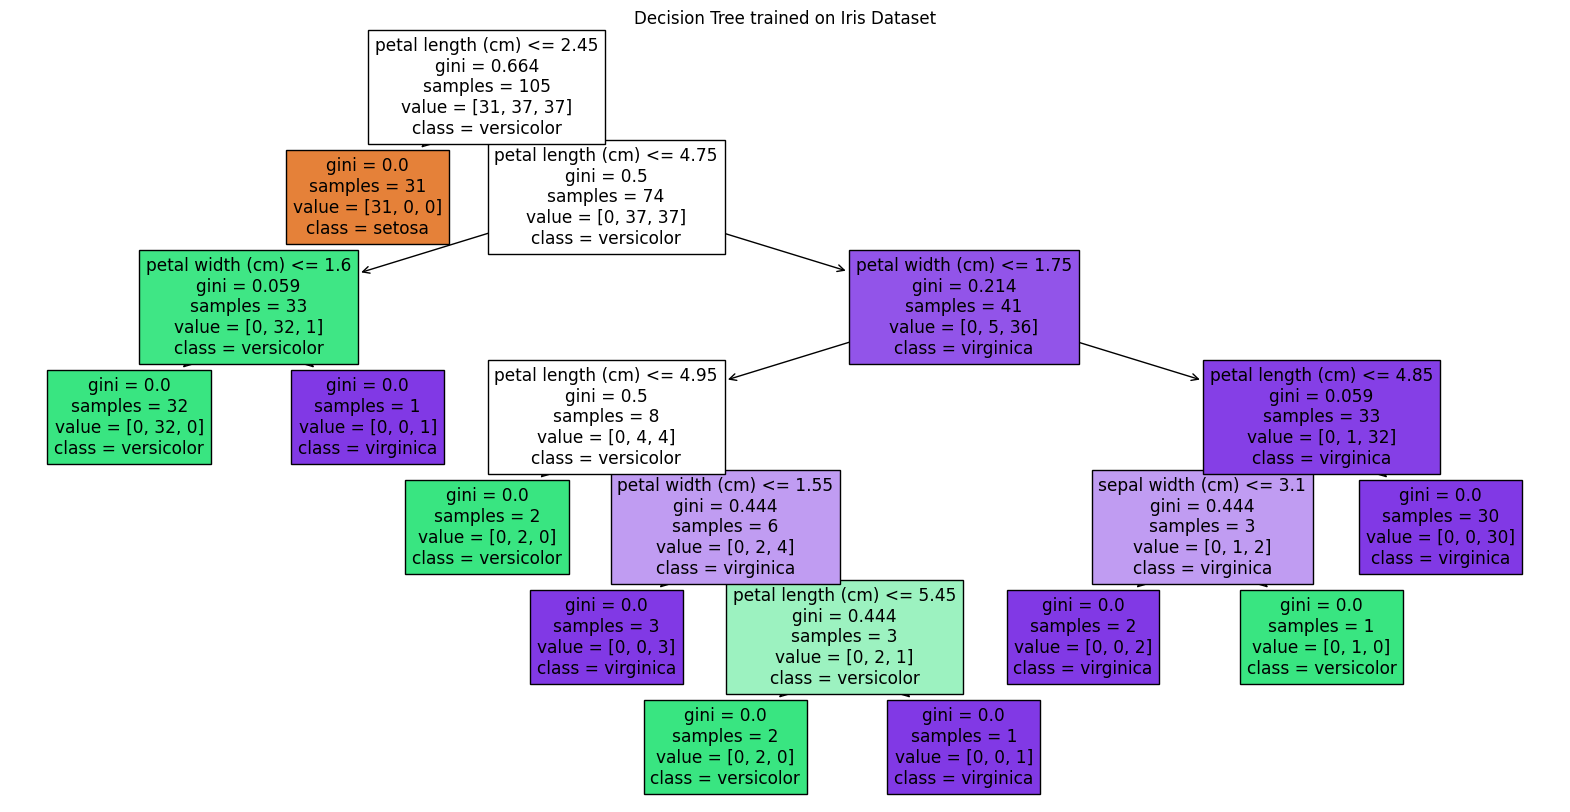

In [9]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.title("Decision Tree trained on Iris Dataset")
plt.show()


# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



**a)** A **Support Vector Machine (SVM)** is a **supervised learning** algorithm because it learns from **labeled training data** to perform classification or regression by finding a decision boundary that separates different classes.

**b)** The **margin** in SVM is the distance between the decision boundary (hyperplane) and the nearest data points from each class. SVM aims to **maximize the margin** because a larger margin improves generalization, making the model more robust to noise and unseen data.

**c)** **Support vectors** are the data points that lie closest to the decision boundary. They are important because they **directly determine the position and orientation of the hyperplane**; removing other points does not change the boundary, but removing support vectors does.

**d)** A **kernel function** allows SVM to handle **non-linearly separable data** by implicitly mapping inputs into a higher-dimensional space where a linear separation is possible. Commonly used kernels include the **Linear kernel** and the **Radial Basis Function (RBF) kernel**.


### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

**a)** In a linearly separable dataset, SVM chooses the **optimal separating hyperplane** by maximizing the **margin**, which is the distance between the hyperplane and the closest data points from each class (the support vectors). Among all possible separating hyperplanes, SVM selects the one with the largest margin, as it provides better generalization.

**b)** When the data is **not linearly separable**, SVM uses a **soft margin** approach that allows some misclassifications by introducing slack variables, and/or applies a **kernel function** to map the data into a higher-dimensional space where a linear separation becomes possible.

**c)** The **regularization parameter (C)** controls the trade-off between maximizing the margin and minimizing classification errors. When **(C) is very large**, SVM heavily penalizes misclassifications, leading to a smaller margin and a risk of overfitting. When **(C) is very small**, misclassifications are allowed more freely, resulting in a larger margin but potentially underfitting the data.
